In [454]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. Data Understanding

## Load and Explore Dataset

Import the pandas and numpy package

In [455]:
import pandas as pd
import numpy as np

In [456]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

Load the dataset into the dataframe
- train_df
- test_df

In [457]:
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')

/var/folders/lk/qbgh0syd1l7_7h6ghvq233nr0000gn/T/ipykernel_17491/3836542260.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('../data/raw/train.csv')


In [458]:
train_df.iloc[:, 26].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: num, dtype: object

In [459]:
test_df.iloc[:, 26].head()

0    25.0
1     0.0
2    32.0
3    32.0
4     5.0
Name: num, dtype: float64

Column 26 is num, which is the Player Numbers.

In [460]:
train_df = pd.read_csv('../data/raw/train.csv', low_memory=False)
test_df = pd.read_csv('../data/raw/test.csv', low_memory=False)

Display the first few rows of the df

In [461]:
train_df.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,all,NaN,1.823646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,all,NaN,1.631621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,all,NaN,1.081662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,all,NaN,0.942830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,all,NaN,0.491229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


In [462]:
test_df.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id
0,Morgan St.,MEAC,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,0.0,0.0,0,0,0.000,0,0,0.000,1,3,0.333,0.0,0.0,0.0,Sr,4-Jun,25.0,0.261536,91.8097,3.5,2021,all,NaN,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,106.4190,110.8410,0.655018,3.04099,-6.329190,-2.48656,-3.842620,-4.743390,10.0000,-2.467740,-2.275660,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,1.0000,cf302b4d-84f7-4124-a25d-a75eed31978b
1,South Carolina St.,MEAC,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,8.1,30.4,1,2,0.500,2,8,0.250,7,28,0.250,0.0,0.9,5.6,Sr,Jun-00,0.0,-1.110000,57.5491,2.8,2021,all,NaN,0.384583,2.0,4.0,0.0,4.0,0.5000,0.0000,0.0,0.0,NaN,NaN,110.1920,116.0180,0.450228,21.52420,-11.237600,-7.65745,-3.580200,-11.907200,11.5455,-7.494720,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636,f91837cd-4f49-4b70-963d-aeb82c6ce3da
2,Binghamton,AE,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,10.0,21.9,14,32,0.438,33,59,0.559,0,2,0.000,9.0,1.7,52.5,Sr,9-Jun,32.0,0.662985,93.6716,5.5,2021,all,NaN,0.500000,26.0,37.0,7.0,22.0,0.7027,0.3182,9.0,10.0,0.9,NaN,99.2886,105.5980,1.706130,48.26240,-0.796603,-3.88882,3.092220,-1.207060,23.3333,-2.924950,1.717890,1.3333,4.4444,5.7778,1.0000,0.6667,1.8889,8.8889,53ec2a29-1e7d-4c6d-86d7-d60d02af8916
3,Illinois,B10,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,0.0,33.6,0,0,0.000,1,2,0.500,1,1,1.000,0.0,0.0,0.0,Sr,2-Jun,32.0,0.135373,102.3240,5.0,2021,all,NaN,0.000000,0.0,0.0,1.0,2.0,NaN,0.5000,0.0,0.0,NaN,NaN,100.4870,95.3504,0.253055,2.53301,-1.802590,-1.15052,-0.652075,0.194558,2.2857,-0.767911,0.962469,0.0000,0.2857,0.2857,0.0000,0.0000,0.0000,0.7143,32402798-471c-4a54-8cb4-29cd95199014
4,Iowa St.,B12,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,7.8,16.1,31,36,0.861,62,129,0.481,58,147,0.395,0.3,1.4,13.0,Sr,4-Jun,5.0,2.977030,111.4260,3.5,2021,all,92.8,0.586950,14.0,26.0,48.0,103.0,0.5385,0.4660,0.0,0.0,NaN,NaN,111.7920,104.3060,2.610670,114.53100,1.064440,2.41992,-1.355480,1.874610,32.7826,2.893610,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043,73b960f9-27b8-4431-9d23-a760e9bbc360


Display the dimension (shape) of df

In [463]:
train_df.shape

(56091, 64)

In [464]:
test_df.shape

(4970, 63)

Display the summary (info) of df

In [465]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  object 
 1   conf                 56091 non-null  object 
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

In [466]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 63 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 4970 non-null   object 
 1   conf                 4970 non-null   object 
 2   GP                   4970 non-null   int64  
 3   Min_per              4970 non-null   float64
 4   Ortg                 4970 non-null   float64
 5   usg                  4970 non-null   float64
 6   eFG                  4970 non-null   float64
 7   TS_per               4970 non-null   float64
 8   ORB_per              4970 non-null   float64
 9   DRB_per              4970 non-null   float64
 10  AST_per              4970 non-null   float64
 11  TO_per               4970 non-null   float64
 12  FTM                  4970 non-null   int64  
 13  FTA                  4970 non-null   int64  
 14  FT_per               4970 non-null   float64
 15  twoPM                4970 non-null   i

Display the descriptive statistics of df

In [467]:
train_df.describe()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,year,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted
count,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,17036.000000,51901.000000,50010.000000,50010.000000,50010.000000,50010.000000,46627.000000,46403.000000,50010.000000,50010.000000,25298.000000,1386.000000,56047.000000,56047.000000,56047.000000,56047.000000,56047.000000,56047.000000,56047.000000,56047.000000,56053.000000,56047.000000,56047.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56091.000000
mean,23.411973,37.325229,91.858295,18.149265,44.575513,47.676882,5.575376,12.673716,10.848740,20.337819,32.926708,47.152627,0.579696,41.412401,85.319160,0.426941,15.677613,45.616480,0.227449,1.876426,1.715305,37.437150,0.775720,89.328297,4.242936,2014.536557,53.456363,0.932305,28.066087,47.052490,14.494741,40.523115,0.564080,0.323633,3.836553,4.311618,0.863570,33.254690,103.319021,103.476636,1.438807,82.827595,-2.525068,-1.896939,-0.628129,-2.525672,16.973259,-2.083375,-0.442297,0.770611,1.892593,2.663204,1.073038,0.529475,0.282825,5.775381,0.009556
std,10.090542,28.061897,30.538819,6.204489,18.213813,17.414133,9.480239,10.878099,9.356001,12.226129,36.870041,49.557538,0.268678,43.730858,85.130054,0.193498,21.584619,58.060609,0.190430,5.876399,2.080477,36.813143,1.333574,30.923798,4.610406,3.450911,27.641745,0.696625,30.144876,47.582825,17.538837,44.401559,0.190824,0.171453,7.943541,8.709568,0.230396,16.651343,10.163752,11.033215,1.064868,65.344533,7.586977,5.184468,4.280805,8.304955,10.623801,6.190166,3.279438,0.738899,1.479148,2.099913,1.171148,0.469152,0.417754,4.953723,0.097287
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.792410,-39.021300,0.000000,2009.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1330.060000,-1292.020000,-0.857238,0.043033,-102.186000,-92.593500,-57.459400,-242.523000,0.000000,-141.539000,-100.984000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,9.500000,84.100000,14.500000,40.100000,43.930000,1.800000,8.400000,4.600000,14.800000,4.000000,7.000000,0.500000,5.000000,13.000000,0.375000,0.000000,1.000000,0.000000,0.000000,0.900000,19.400000,-0.170944,79.383600,2.800000,2012.000000,30.600000,0.459428,4.000000,8.000000,2.000000,6.000000,0.500000,0.250000,0.000000,0.000000,0.818200,20.000000,99.013850,98.083800,0.525770,19.846900,-5.377530,-3.986970,-2.285125,-5.379030,7.307700,-4.426515,-1.728030,0.225800,0.700000,1.000000,0.222200,0.160000,0.000000,1.571400,0.000000
50%,28.000000,35.900000,97.100000,18.100000,47.700000,50.850000,4.300000,11.900000,9.100000,19.100000,20.000000,31.000000,0.660000,27.000000,60.000000,0.460000,5.000000,18.000000,0.275000,0.800000,1.500000,32.800000,0.390392,94.648900,3.800000,2015.000000,55.400000,0.822562,18.000000,33.000000,8.000000,25.000000,0.580600,0.333300,0.000000,1.000000,1.000000,34.000000,103.671000,103.827000,1.266370,76.607600,-1.817550,-1.333140,-0.576564,-1.788120,16.714300,-1.580380,-0.313051,0.545500,1.633300,2.259300,0.677400,0.424200,0.133300,4.482800,0.000000
75%,31.000000,62.200000,106.900000,21.800000,53.200000,56.060000,8.100000,16.000000,15.100000,24.500000,50.000000,72.000000,0.755

In [468]:
test_df.describe()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,num,porpag,adjoe,pfr,year,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
count,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4874.000000,4970.000000,4970.000000,4970.000000,4970.0,1434.000000,4433.000000,4722.000000,4722.000000,4722.000000,4722.000000,4324.000000,4273.000000,4722.000000,4722.000000,2253.000000,49.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4970.000000,4969.000000,4969.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000
mean,15.865795,34.906881,89.500644,17.867626,43.657203,46.538342,5.168390,13.048753,10.356801,18.962254,20.459155,28.808249,0.557733,28.559155,57.394165,0.423934,11.578672,34.253320,0.228245,1.755795,1.709336,32.334547,15.050267,0.740874,86.986198,3.957203,2021.0,54.735007,0.986900,20.114147,34.002118,9.928420,26.359170,0.557162,0.341192,2.720246,3.096569,0.856052,30.591837,102.701310,102.764251,1.411658,58.310243,-2.699018,-1.978942,-0.720076,-2.675349,16.569559,-2.149284,-0.526065,0.697025,1.953592,2.650609,1.069840,0.529118,0.260375,5.753262
std,8.276655,27.921356,35.338827,6.780159,20.716630,19.992005,7.030561,9.248595,9.427192,13.255566,24.086666,32.064097,0.304797,32.348485,61.905031,0.219063,15.658638,42.533025,0.193004,3.159920,2.669430,34.581884,12.675128,1.328677,35.634018,3.146791,0.0,26.539638,0.736819,22.605377,35.853871,12.915476,31.311422,0.203258,0.199338,5.793770,6.407538,0.236670,16.824979,9.010928,10.036087,1.065580,50.570677,7.562040,5.428728,3.921998,9.219343,10.550727,6.750792,3.920493,0.683636,1.533018,2.073589,1.153074,0.474838,0.380465,4.881835
min,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.057160,-32.658900,0.000000,2021.0,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-71.060100,-66.130100,-0.314065,0.049147,-53.994300,-45.473100,-28.868900,-91.930200,0.250000,-62.101300,-31.594500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,6.700000,80.900000,14.200000,38.400000,42.340000,1.400000,8.400000,4.300000,13.100000,2.000000,3.000000,0.455000,3.000000,7.000000,0.354000,0.000000,1.000000,0.000000,0.000000,0.700000,14.125000,4.000000,-0.214476,77.030950,2.500000,2021.0,33.200000,0.500000,3.000000,5.000000,1.000000,3.000000,0.482800,0.250000,0.000000,0.000000,0.800000,17.000000,98.608100,97.310200,0.488493,10.163500,-5.642250,-4.028530,-2.352610,-5.700980,6.891675,-4.443960,-1.868180,0.200000,0.750000,1.000000,0.250000,0.142900,0.000000,1.602175
50%,17.000000,32.350000,96.800000,18.000000,48.100000,50.850000,3.700000,12.300000,8.600000,18.100000,12.000000,18.000000,0.663000,17.000000,37.000000,0.471000,4.000000,16.000000,0.273000,0.800000,1.500000,27.300000,12.000000,0.397186,94.163250,3.500000,2021.0,57.700000,0.888889,12.000000,23.000000,5.000000,15.000000,0.572600,0.348300,0.000000,0.000000,1.000000,30.000000,102.971000,102.981000,1.218150,49.415400,-1.864300,-1.302320,-0.652638,-1.757890,16.083350,-1.540360,-0.397400,0.500000,1.666700,2.260900,0.680000,0.428600,0.133300,4.535900
75%,22.000000,59.900000,107.100000,21.800000,54.000000,56.780000,7.400000,16.800000,14.500000,23.400000,31.000000,45.000000,0.769000,44.000000,89.000000,0.543000,18.000000,56.000000,0.356000,2.300000,2.200000,41.775000,23.000000,1.4

Display the missing values in the df

In [469]:
def missing_value(df):
    missing_values = df.isna().sum()
    missing_percentage = (missing_values / len(df)) * 100

    missing_data = pd.DataFrame({
        'Column': missing_values.index,
        'Missing Values': missing_values.values,
        'Missing Percentage': missing_percentage.values
    })
    
    missing_data = missing_data[missing_data['Missing Values'] > 0]
    missing_data = missing_data.sort_values(by='Missing Percentage', ascending=False)

    print("Columns with missing values:")
    print(missing_data)

In [470]:
missing_value(train_df)

Columns with missing values:
                 Column  Missing Values  Missing Percentage
43                 pick           54705           97.529015
32             Rec_Rank           39055           69.627926
42          dunks_ratio           30793           54.898290
39            mid_ratio            9688           17.271933
38            rim_ratio            9464           16.872582
34              rimmade            6081           10.841311
35      rimmade_rimmiss            6081           10.841311
36              midmade            6081           10.841311
37      midmade_midmiss            6081           10.841311
40            dunksmade            6081           10.841311
41  dunksmiss_dunksmade            6081           10.841311
26                  num            4690            8.361413
33              ast_tov            4190            7.470004
24                   yr             292            0.520583
25                   ht              98            0.174716
49         

In [471]:
missing_value(test_df)

Columns with missing values:
                 Column  Missing Values  Missing Percentage
43                 pick            4921           99.014085
32             Rec_Rank            3536           71.146881
42          dunks_ratio            2717           54.668008
39            mid_ratio             697           14.024145
38            rim_ratio             646           12.997988
33              ast_tov             537           10.804829
41  dunksmiss_dunksmade             248            4.989940
34              rimmade             248            4.989940
35      rimmade_rimmiss             248            4.989940
36              midmade             248            4.989940
37      midmade_midmiss             248            4.989940
40            dunksmade             248            4.989940
26                  num              96            1.931590
25                   ht              13            0.261569
24                   yr               2            0.040241
44         

In [472]:
train_df.duplicated().sum()

0

In [473]:
test_df.duplicated().sum()

0

In [474]:
train_df['player_id'].nunique()

23929

In [475]:
test_df['player_id'].nunique()

4970

In [476]:
train_df['drafted'].value_counts(normalize=True)

drafted
0.0    0.990444
1.0    0.009556
Name: proportion, dtype: float64

## 3.Data Preparation

Create a copy of df and assigned it into a variable called df_cleaned

In [637]:
df_cleaned_train = train_df.copy()

In [638]:
df_cleaned_test = test_df.copy()

We will categorize our data in two types: categorical and numerical columns. This distinction will help us apply appropriate preprocessing techniques to each type of data.

In [479]:
import missingno as msno

<Axes: >

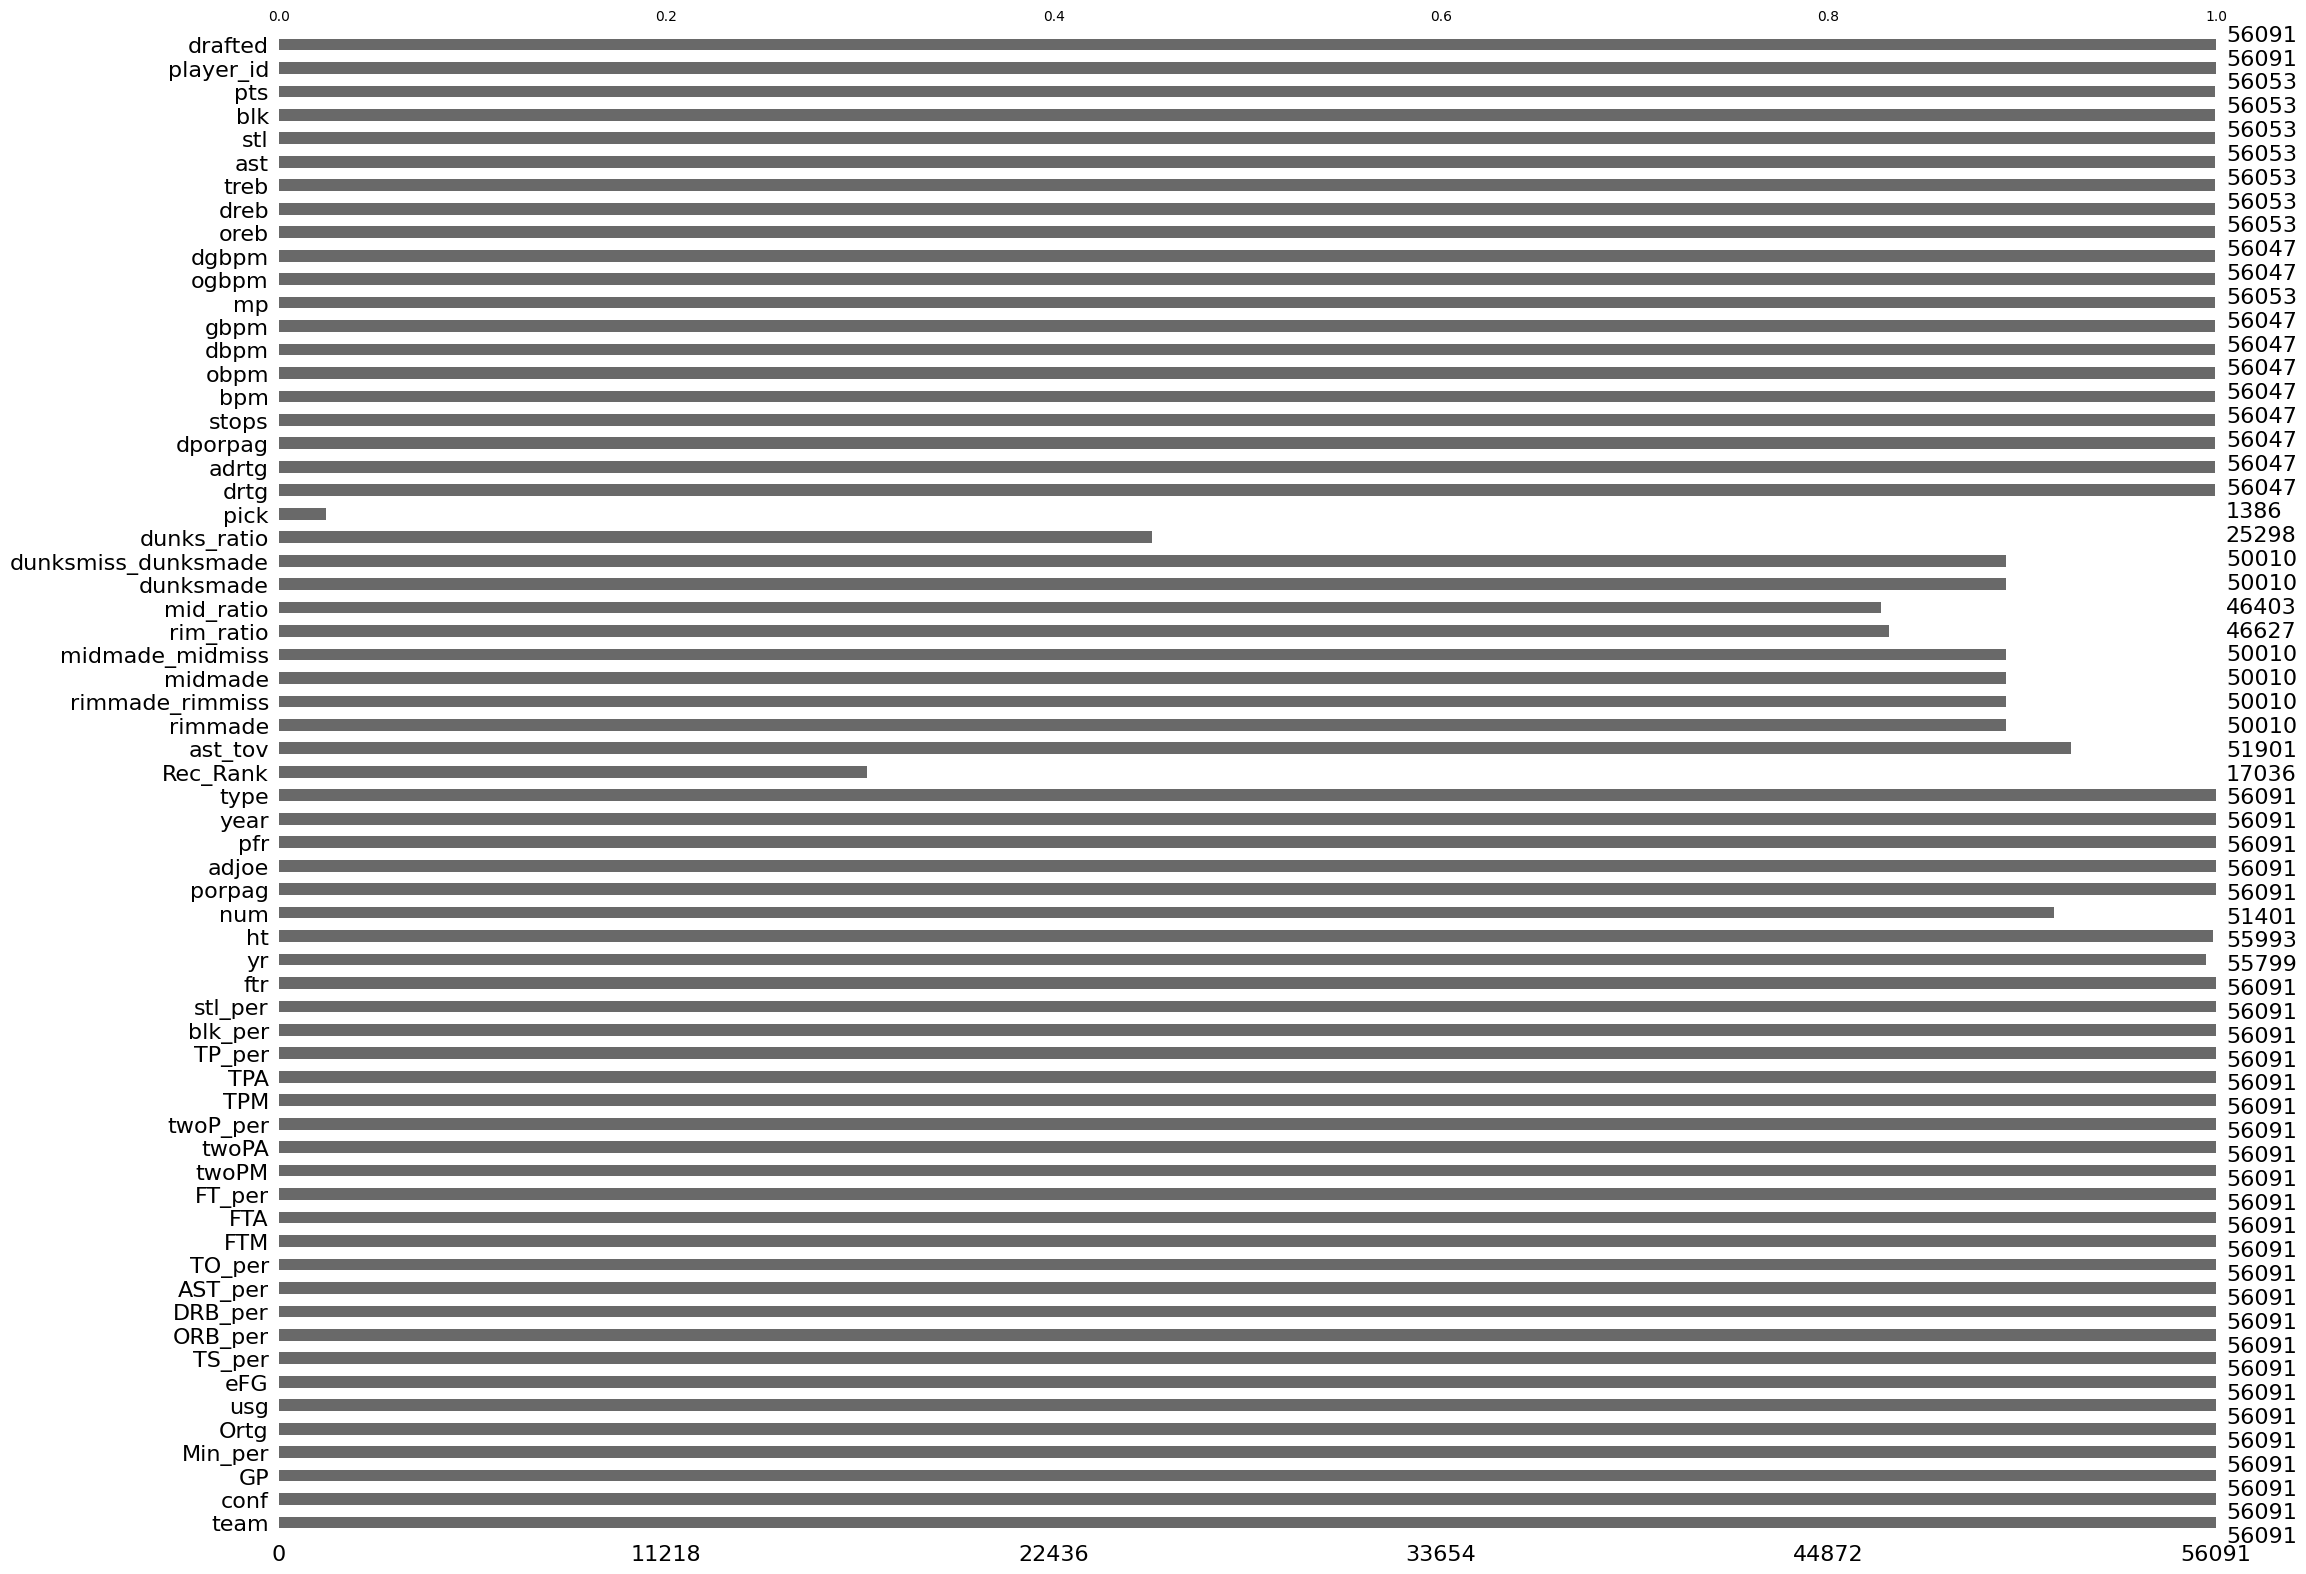

In [480]:
msno.bar(df_cleaned_train)

<Axes: >

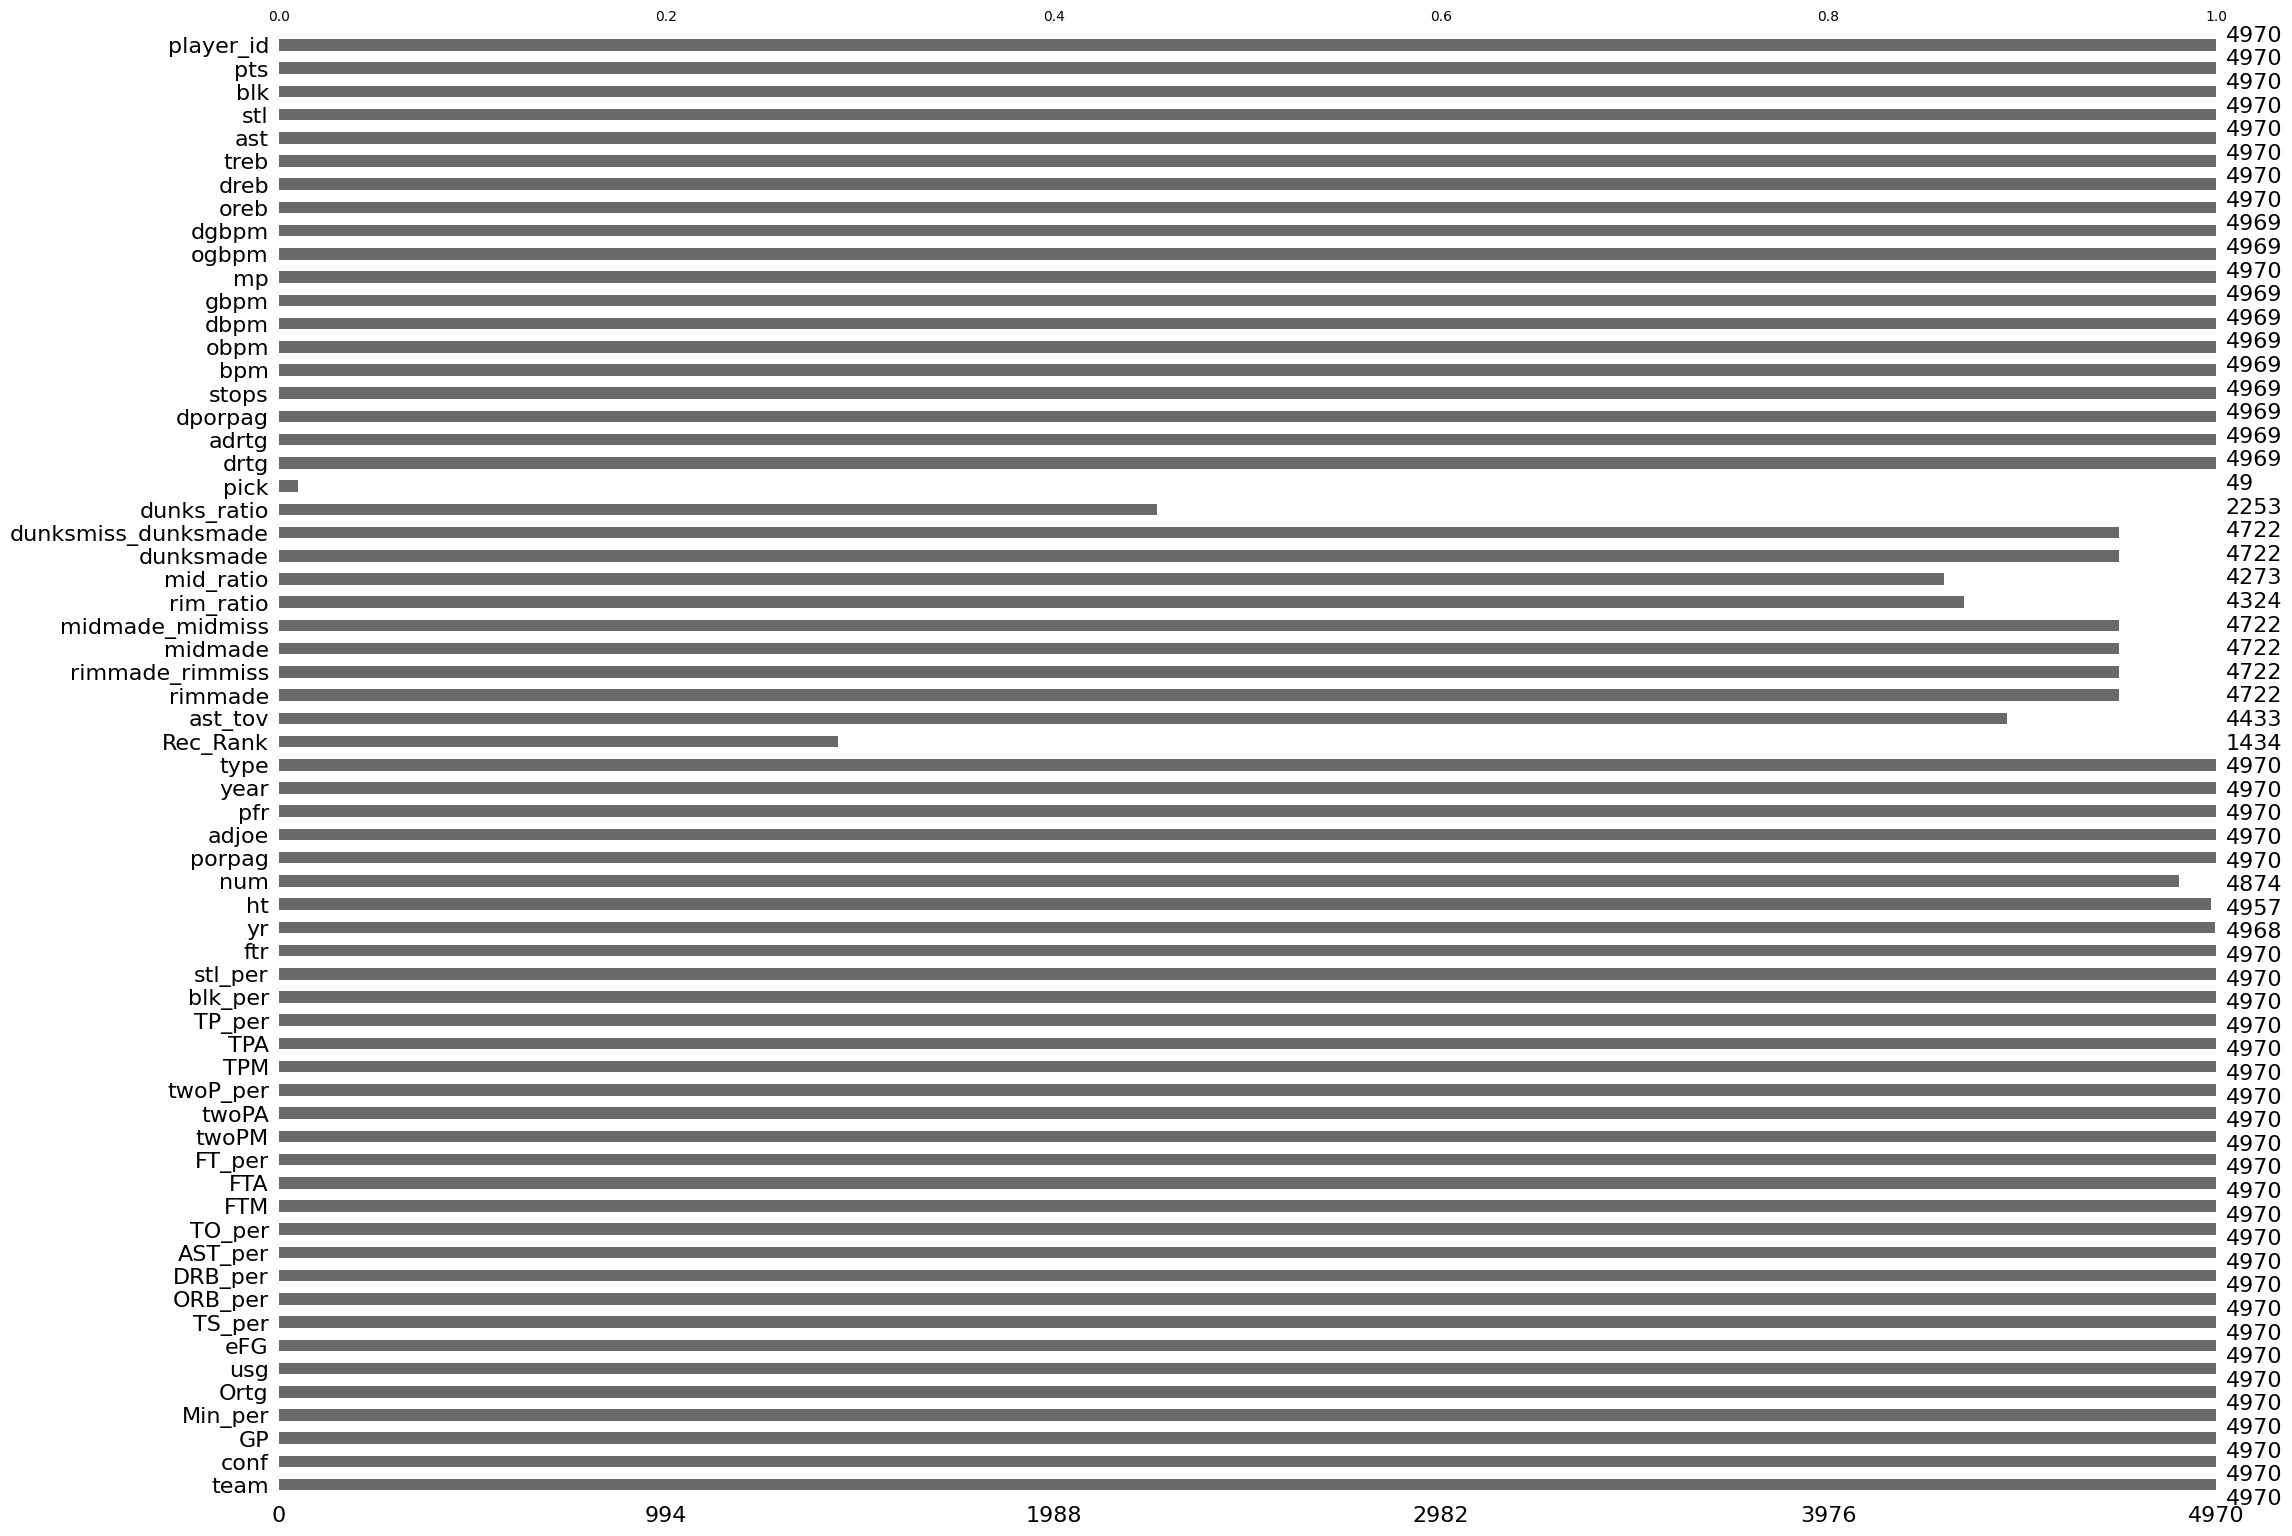

In [481]:
msno.bar(df_cleaned_test)

<Axes: >

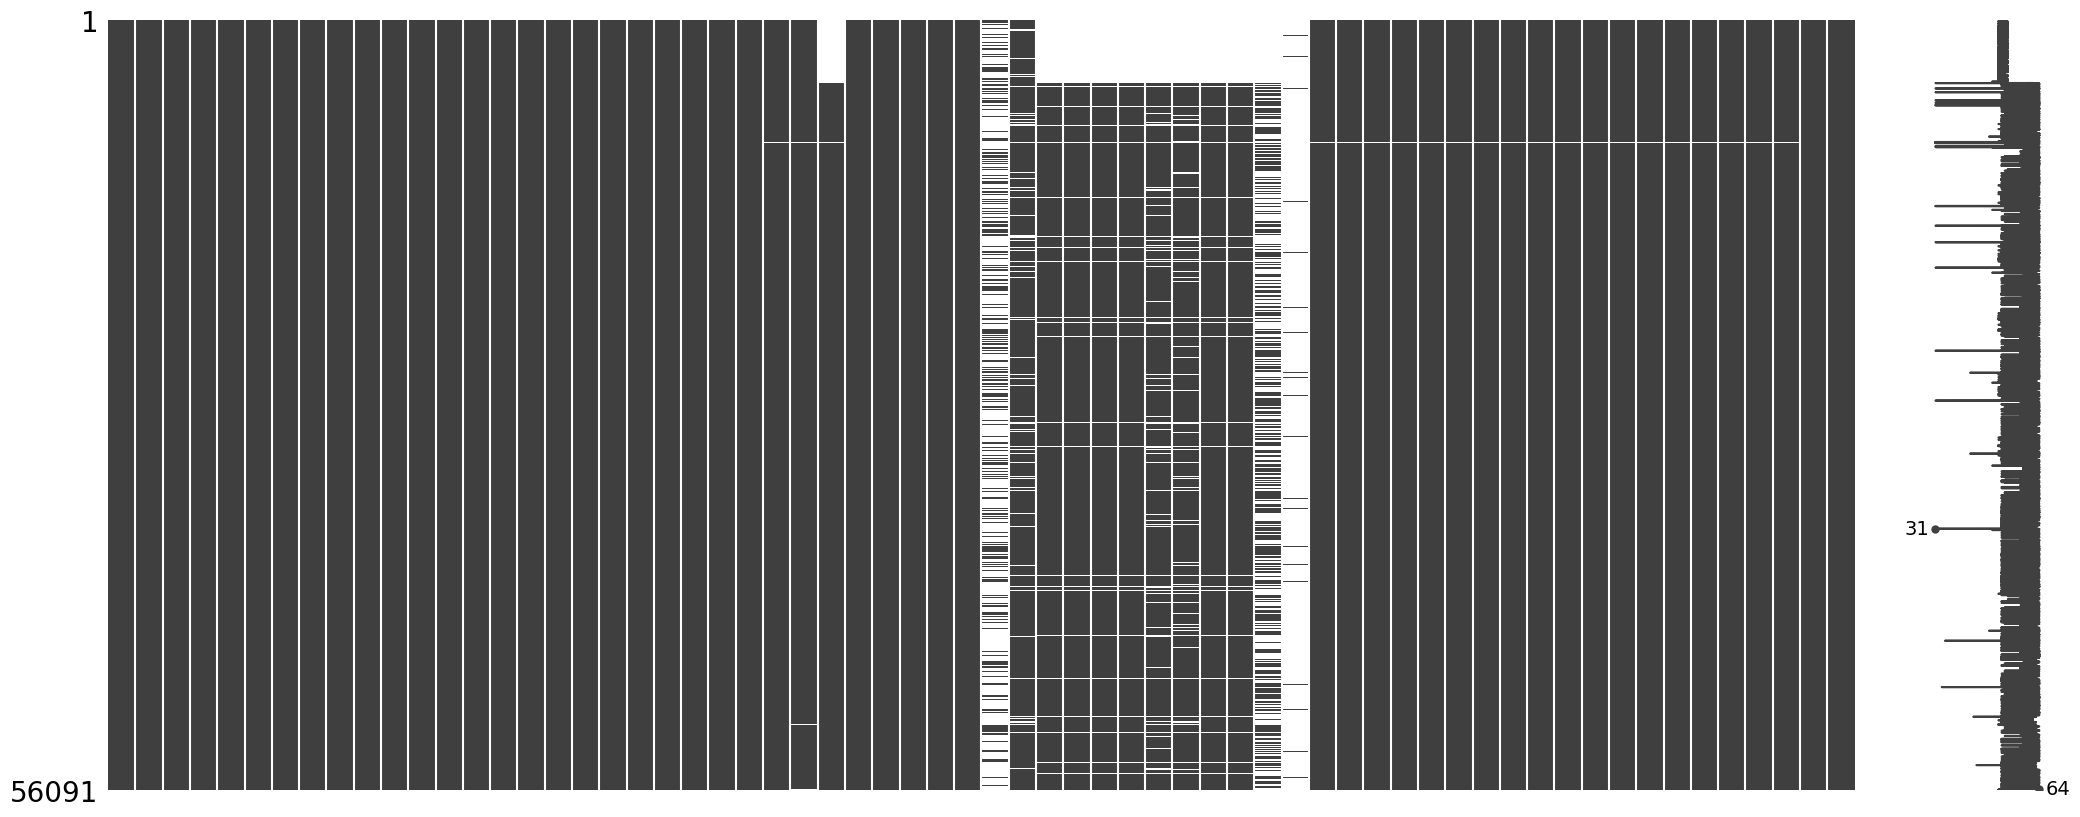

In [482]:
msno.matrix(df_cleaned_train)

<Axes: >

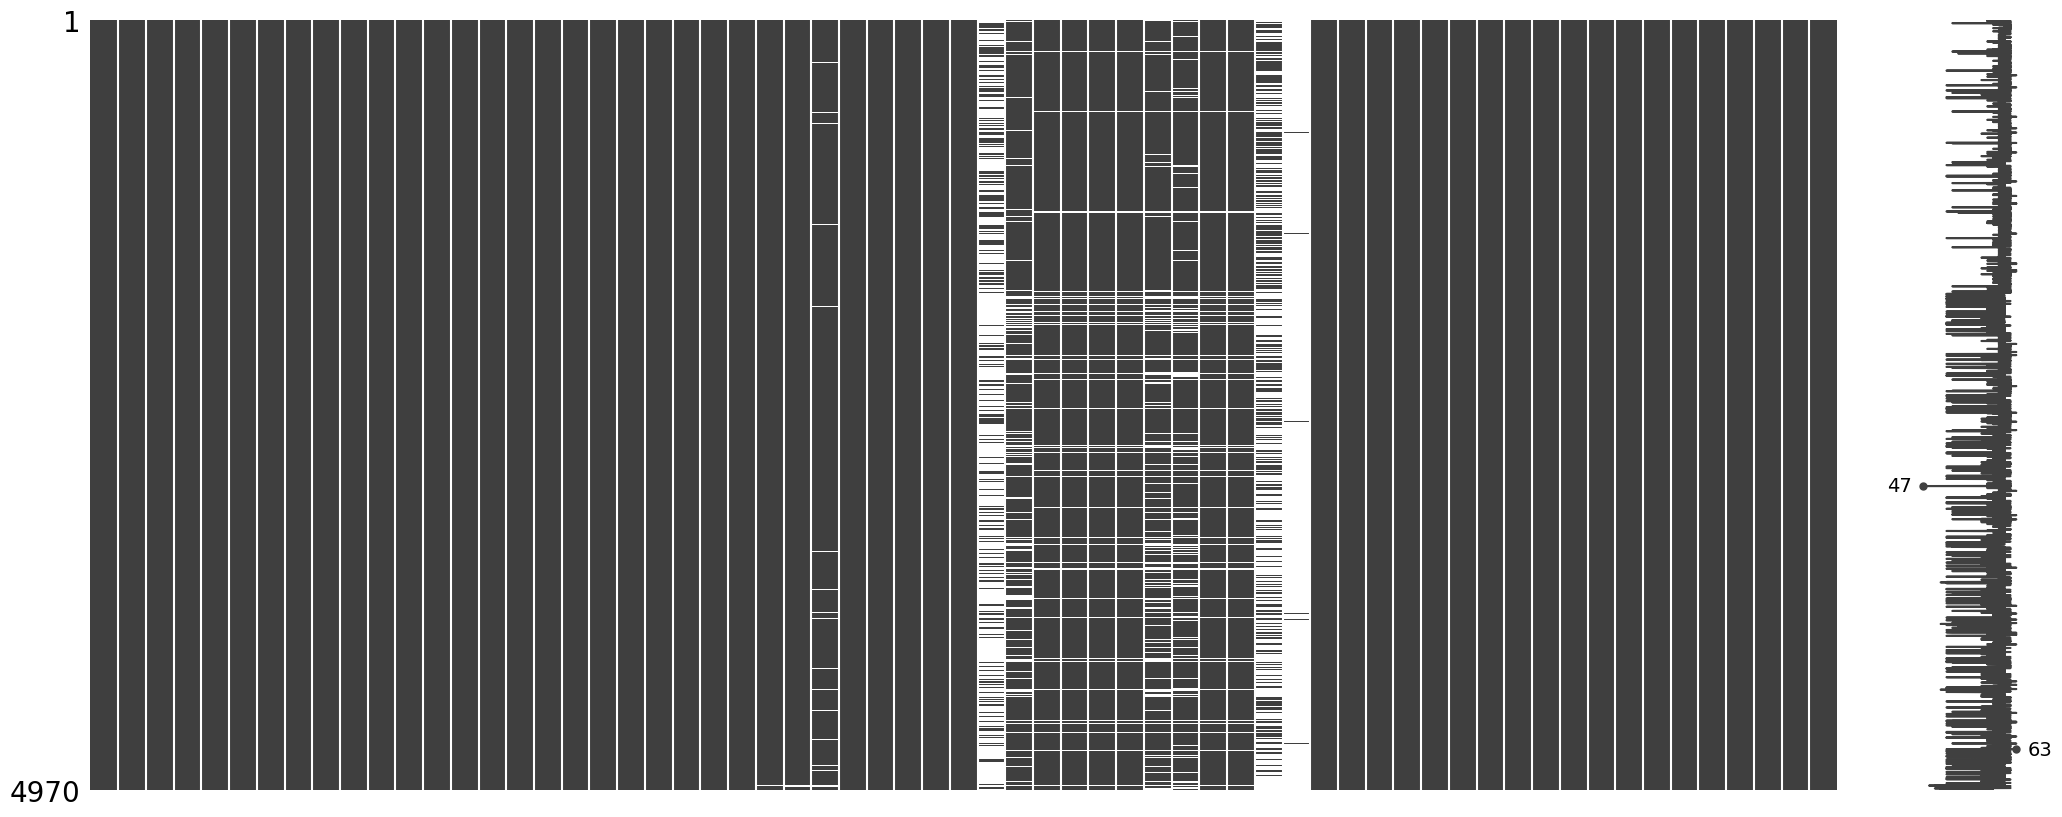

In [483]:
msno.matrix(df_cleaned_test)

#### Large Number of Missing

- 'Rec_Rank'
- 'dunks_ratio'
- 'pick'

In [639]:
df_cleaned_train.drop(columns=['Rec_Rank', 'dunks_ratio', 'pick'], inplace=True)

In [640]:
df_cleaned_test.drop(columns=['Rec_Rank', 'dunks_ratio', 'pick'], inplace=True)

#### Missing Data Pattern

The below column appears to have a missing value with pattern.
- rimmade
- rimmade_rimmiss
- midmade
- midmade_midmiss
- dunksmade
- dunksmiss_dunksmade

### Numerical Columns

In [641]:
cat_cols = [feature for feature in df_cleaned_train.columns if df_cleaned_train[feature].dtypes=='O']

In [642]:
num_cols = [feature for feature in df_cleaned_train.columns if df_cleaned_train[feature].dtypes!='O']

In [643]:
num_cols.remove('drafted')

We'll impute the missing value with the mean values of each 'player_id' group.

In [644]:
train_missing_column = df_cleaned_train.columns[df_cleaned_train.isnull().any()].tolist()
train_missing_column = [feature for feature in train_missing_column if df_cleaned_train[feature].dtypes != 'O']

In [645]:
grouped = df_cleaned_train.groupby('player_id')
mean_val = grouped[train_missing_column].transform('mean')

df_cleaned_train[train_missing_column] = df_cleaned_train[train_missing_column].fillna(mean_val)

In [646]:
missing_value(df_cleaned_train[num_cols])

Columns with missing values:
                 Column  Missing Values  Missing Percentage
32            mid_ratio            4541            8.095773
31            rim_ratio            4446            7.926405
28      rimmade_rimmiss            2393            4.266282
29              midmade            2393            4.266282
30      midmade_midmiss            2393            4.266282
33            dunksmade            2393            4.266282
34  dunksmiss_dunksmade            2393            4.266282
27              rimmade            2393            4.266282
26              ast_tov            2026            3.611988
40                 obpm               5            0.008914
45                dgbpm               5            0.008914
44                ogbpm               5            0.008914
42                 gbpm               5            0.008914
41                 dbpm               5            0.008914
39                  bpm               5            0.008914
38         

In [647]:
df_cleaned_train[train_missing_column].describe()

,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
count,54065.000000,53698.000000,53698.000000,53698.000000,53698.000000,51645.000000,51550.000000,53698.000000,53698.000000,56086.000000,56086.000000,56086.000000,56086.000000,56086.000000,56086.000000,56086.000000,56086.000000,56089.000000,56086.000000,56086.000000,56089.000000,56089.000000,56089.000000,56089.000000,56089.000000,56089.000000,56089.000000
mean,0.921180,27.991593,46.863388,14.613948,40.835053,0.562117,0.321347,3.821293,4.291340,103.319317,103.477696,1.438328,82.798016,-2.527446,-1.898615,-0.628831,-2.528236,16.969197,-2.085250,-0.442987,0.770447,1.892082,2.662530,1.072681,0.529342,0.282753,5.773651
std,0.701137,30.146067,47.540253,17.713919,44.850494,0.198208,0.177084,7.933403,8.697583,10.161744,11.031394,1.064859,65.342818,7.586437,5.184561,4.280032,8.304945,10.624156,6.189976,3.279373,0.738842,1.479064,2.099819,1.170939,0.469116,0.417671,4.953413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1330.060000,-1292.020000,-0.857238,0.043033,-102.186000,-92.593500,-57.459400,-242.523000,0.000000,-141.539000,-100.984000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.444480,4.000000,8.000000,2.000000,6.000000,0.500000,0.250000,0.000000,0.000000,99.015325,98.084575,0.525018,19.821175,-5.380637,-3.988370,-2.285470,-5.381340,7.300000,-4.428097,-1.728892,0.225800,0.700000,1.000000,0.222200,0.160000,0.000000,1.571400
50%,0.811590,18.000000,32.666667,8.000000,26.000000,0.579900,0.333300,0.000000,1.000000,103.671000,103.828000,1.265870,76.566600,-1.822540,-1.334065,-0.576894,-1.790710,16.709700,-1.582455,-0.313478,0.545500,1.633300,2.259300,0.677400,0.424200,0.133300,4.481500
75%,1.250036,43.000000,72.000000,21.500000,61.000000,0.666700,0.400000,4.000000,5.000000,108.258750,109.315750,2.169745,134.923250,1.401277,1.012985,1.123205,1.397480,26.312500,0.992050,1.065930,1.111100,2.757600,3.833300,1.533300,0.793100,0.366700,9.066700
max,14.007605,247.000000,358.000000,222.000000,532.000000,1.000000,1.000000,122.000000,132.000000,131.461000,144.685000,5.800530,360.572000,685.313000,161.995000,523.319000,269.508000,50.000000,225.485000,78.985500,5.933300,11.545500,14.533300,10.000000,4.000000,5.258100,30.090900


In [648]:
missing_value(df_cleaned_test[num_cols])

Columns with missing values:
                 Column  Missing Values  Missing Percentage
32            mid_ratio             697           14.024145
31            rim_ratio             646           12.997988
26              ast_tov             537           10.804829
28      rimmade_rimmiss             248            4.989940
29              midmade             248            4.989940
30      midmade_midmiss             248            4.989940
33            dunksmade             248            4.989940
34  dunksmiss_dunksmade             248            4.989940
27              rimmade             248            4.989940
40                 obpm               1            0.020121
44                ogbpm               1            0.020121
42                 gbpm               1            0.020121
41                 dbpm               1            0.020121
35                 drtg               1            0.020121
39                  bpm               1            0.020121
38         

In [649]:
df_cleaned_test[train_missing_column].describe()

,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
count,4433.000000,4722.000000,4722.000000,4722.000000,4722.000000,4324.000000,4273.000000,4722.000000,4722.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4970.000000,4969.000000,4969.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000
mean,0.986900,20.114147,34.002118,9.928420,26.359170,0.557162,0.341192,2.720246,3.096569,102.701310,102.764251,1.411658,58.310243,-2.699018,-1.978942,-0.720076,-2.675349,16.569559,-2.149284,-0.526065,0.697025,1.953592,2.650609,1.069840,0.529118,0.260375,5.753262
std,0.736819,22.605377,35.853871,12.915476,31.311422,0.203258,0.199338,5.793770,6.407538,9.010928,10.036087,1.065580,50.570677,7.562040,5.428728,3.921998,9.219343,10.550727,6.750792,3.920493,0.683636,1.533018,2.073589,1.153074,0.474838,0.380465,4.881835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-71.060100,-66.130100,-0.314065,0.049147,-53.994300,-45.473100,-28.868900,-91.930200,0.250000,-62.101300,-31.594500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,3.000000,5.000000,1.000000,3.000000,0.482800,0.250000,0.000000,0.000000,98.608100,97.310200,0.488493,10.163500,-5.642250,-4.028530,-2.352610,-5.700980,6.891675,-4.443960,-1.868180,0.200000,0.750000,1.000000,0.250000,0.142900,0.000000,1.602175
50%,0.888889,12.000000,23.000000,5.000000,15.000000,0.572600,0.348300,0.000000,0.000000,102.971000,102.981000,1.218150,49.415400,-1.864300,-1.302320,-0.652638,-1.757890,16.083350,-1.540360,-0.397400,0.500000,1.666700,2.260900,0.680000,0.428600,0.133300,4.535900
75%,1.333178,31.000000,53.000000,14.000000,38.000000,0.666700,0.440000,3.000000,3.000000,107.455000,108.692000,2.202800,95.939300,1.485150,1.087100,1.055840,1.594100,25.991375,1.103500,1.049540,1.000000,2.882400,3.800000,1.533300,0.807700,0.333300,9.000000
max,10.009008,192.000000,256.000000,97.000000,257.000000,1.000000,1.000000,78.000000,82.000000,131.212000,136.334000,5.177530,256.359000,70.273000,58.338100,53.497100,184.669000,38.800000,160.805000,71.811500,5.148100,10.681800,15.000000,8.400000,3.565200,3.640000,25.333300


In [495]:
def histplot(df, missing_columns):
    fig, axes = plt.subplots(nrows=len(missing_columns), figsize=(10, 30))

    for i,c in enumerate(missing_columns):
        sns.histplot(df[c], ax=axes[i], kde=True, color='orange')
    
        mean = df[c].mean()
        median = df[c].median()
    
        axes[i].axvline(mean, color='red', linestyle='--', label=f"Mean: {mean:.2f}")
        axes[i].axvline(median, color='blue', linestyle='--', label=f"Median: {median:.2f}")
    
        axes[i].set_title(f'Histrogram for {c}')
        axes[i].set_xlabel(c)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()

    plt.tight_layout()
    plt.show()

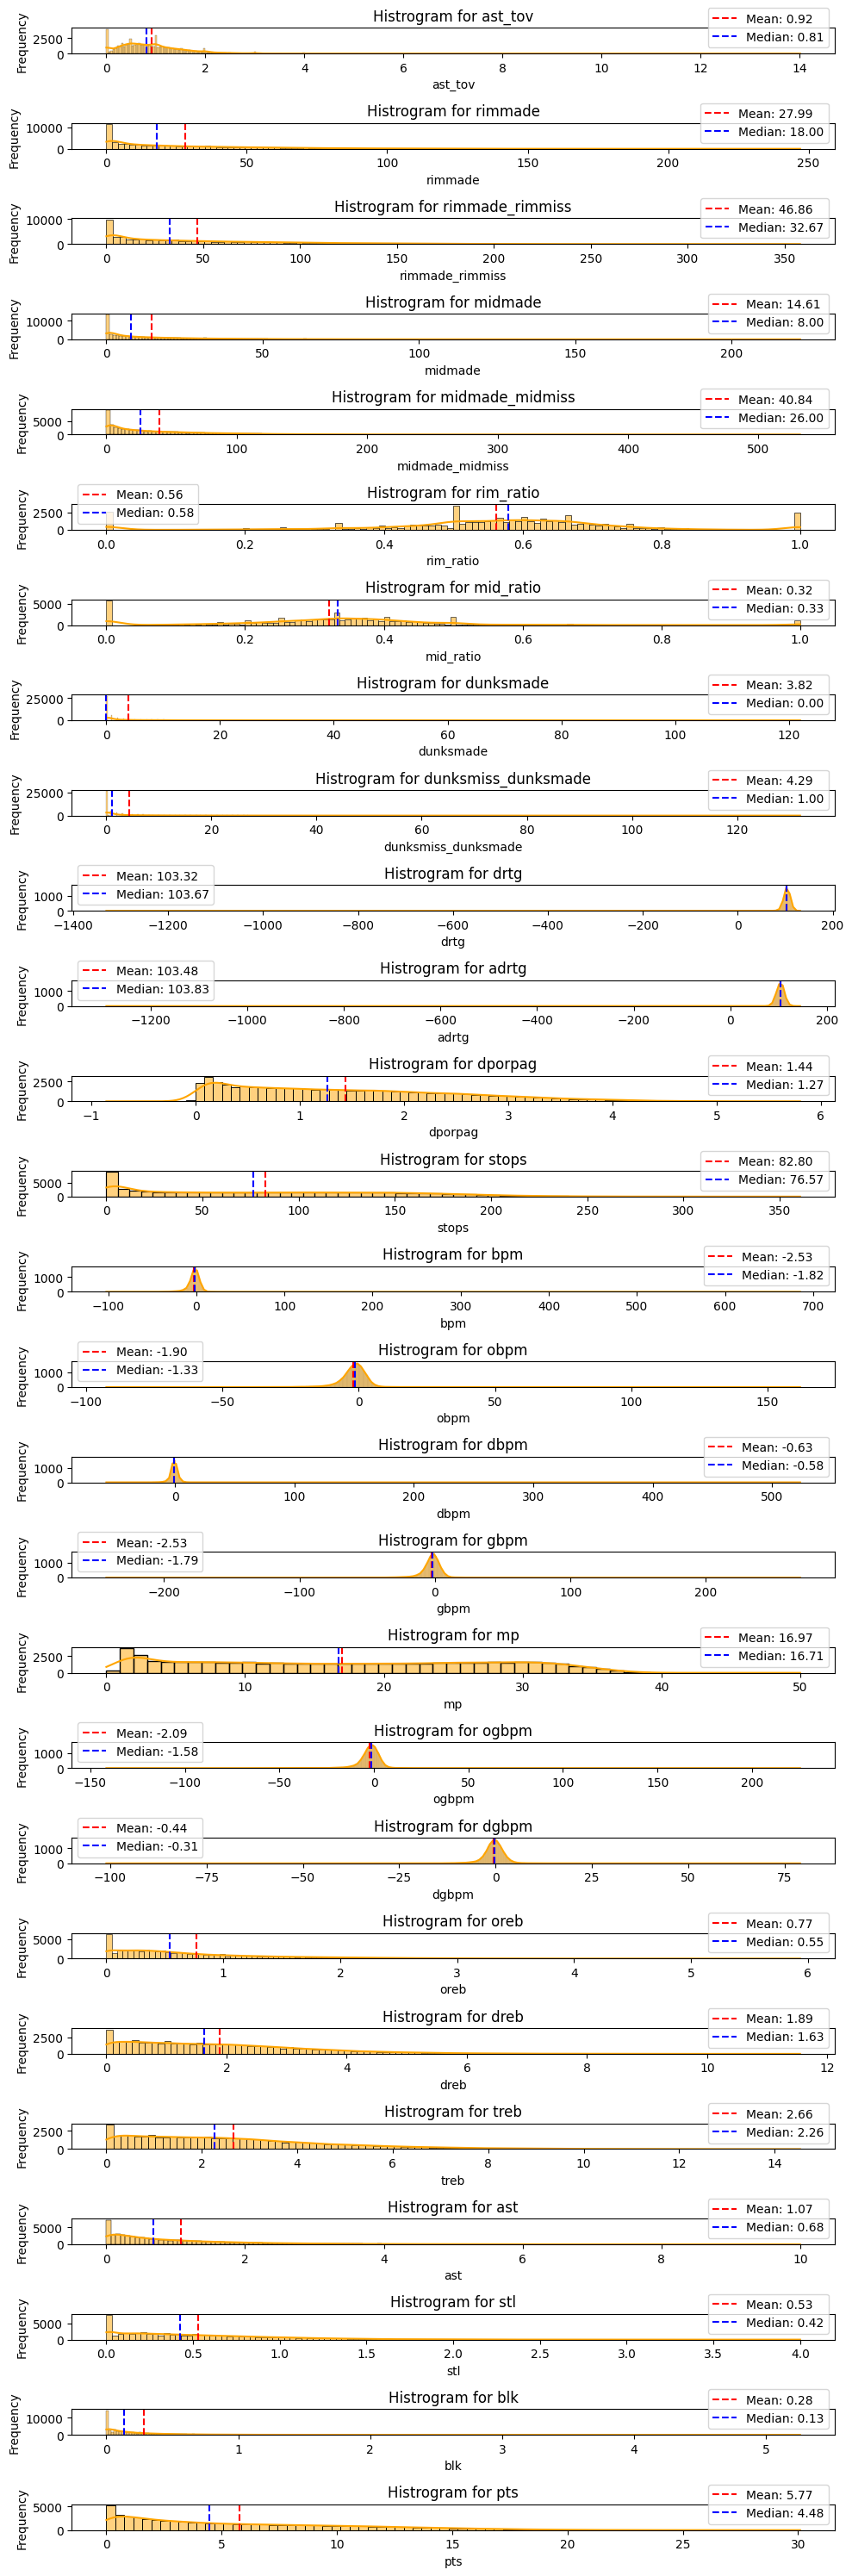

In [252]:
histplot(df_cleaned_train, train_missing_column)

Fill Missing Value with Mean

In [650]:
df_cleaned_train[num_cols] = df_cleaned_train[num_cols].fillna(df_cleaned_train[num_cols].mean())

In [651]:
df_cleaned_test[num_cols] = df_cleaned_test[num_cols].fillna(df_cleaned_test[num_cols].mean())

### Categorical Columns

We will extract the categorical columns from our df.

In [652]:
cat_cols

['team', 'conf', 'yr', 'ht', 'num', 'type', 'player_id']

The following columns fall under the categorical category:

- **team:** Name of team
- **conf:** Name of conference
- **yr:** Student’s year of study: `Fr` for freshmen, `So` for sophomores, `Jr` for juniors, `Sr` for seniors
- **ht:** Height of student
- **num:** Player's number
- **type:** Type of metrics displayed: `All` for all types, `C` for conference`, `NC` for non-conference, `PC` for pre-conference tour, `R` for regular season, `P` for post-season, `T` for NCAA
- **player_id:** Unique identifier of player.


Import matplotlib and seaborn

In [653]:
import matplotlib.pyplot as plt
import seaborn as sns

In [654]:
palette = 'ch:.25'

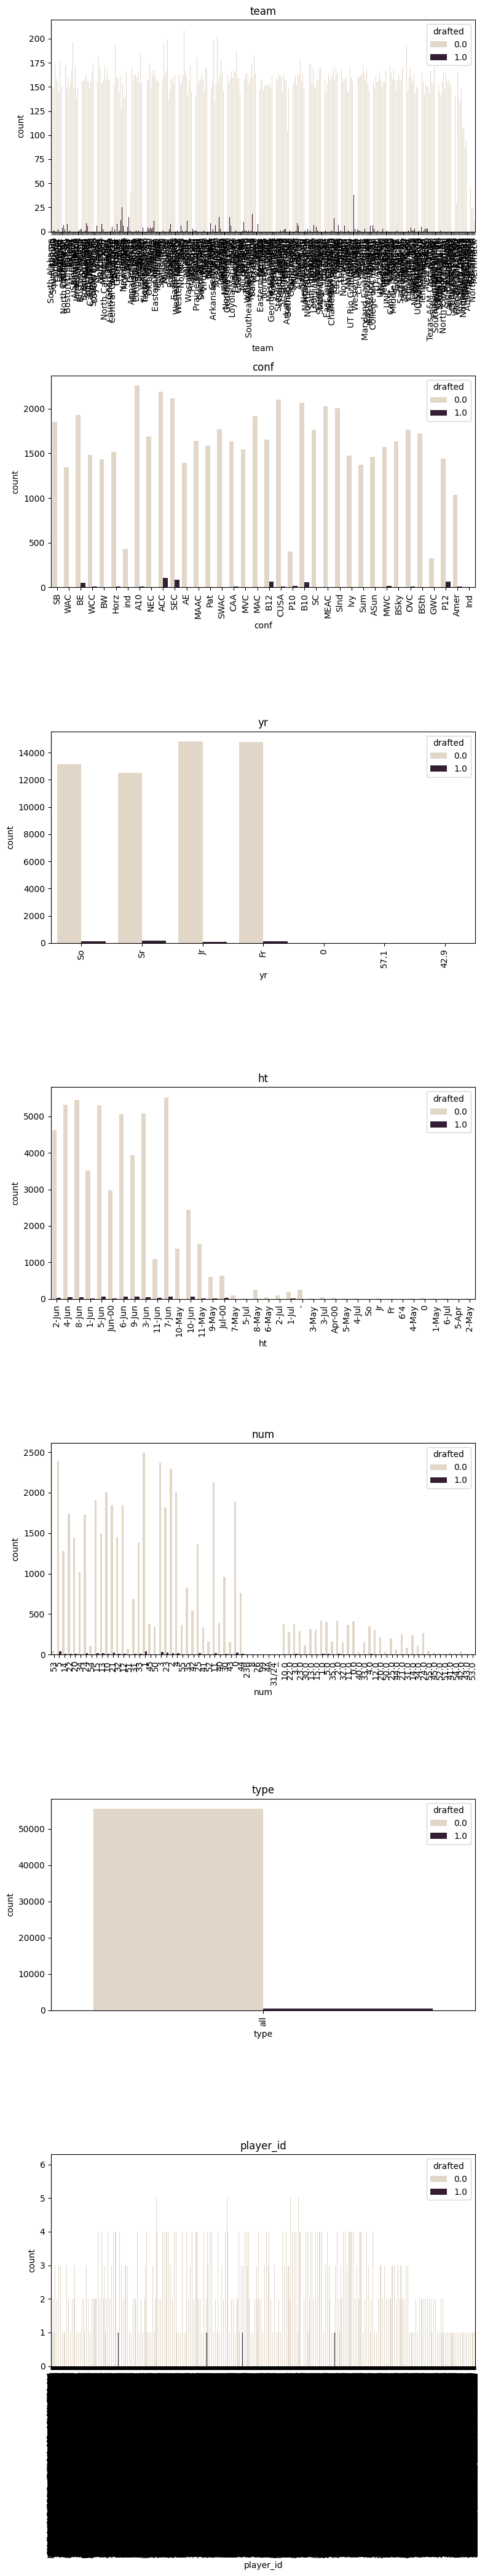

In [394]:
fig, axes = plt.subplots(len(cat_cols), 1, figsize=(8, 6 * len(cat_cols)))

for i, (c, ax) in enumerate(zip(cat_cols, axes)):
    sns.countplot(x=c, data=train_df, ax=ax, palette=palette, hue='drafted')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title(c)
    
plt.tight_layout()
plt.show()

In [655]:
for i in cat_cols:
    print(f"{i}: {df_cleaned_train[i].nunique()}")

team: 358
conf: 36
yr: 7
ht: 38
num: 79
type: 1
player_id: 23929


In [656]:
for i in cat_cols:
    print(f"{i}: {df_cleaned_test[i].nunique()}")

team: 347
conf: 31
yr: 4
ht: 24
num: 36
type: 1
player_id: 4970


- **team:** There are 358 and 347 unique teams in train and test df, respectively.
- **conf:** There are 36 and 31 unique conference in train and test df, respectively.
- **yr:** The year column should be an ordinal type which contain four different year of student.
- **ht:** The height of student contains a mix data type.
- **num:** There are some special number that need to be convert.
- **type:** There was only one unique value in this column.
- **player_id:** There are 23929 and 4970 unique player in train and test dataset.


We will perform the following steps for categorical columns:

1. **Target Encoding:** We'll perform Target encoding on 'team' and 'conf' columns. But before that, we will create 'team_unknown' and 'conf_unknown' columns.
2. **Ordianal Mapping:** We'll convert the ordinal category into numerical values, mapping `Fr` to 1, `So` to 2, `Jr` to 3, and `Sr` to 4.
4. **Drop some columns:** 'ht' column will be drop, since the height column contain mixed data type and didn't provide any useful information. 'type' and 'player_id' will also be dropped, since 'type' column has only one unique value and 'player_id' column is a unique identifier for each player.

5. **Other Technique:**

Number of unique value in each categorical columns

#### Target Encoding - 'team' and 'conf'

#### 'team'

Find the team that occur in df_cleaned_train but not in df_cleaned_test

In [657]:
teams_train = set(df_cleaned_train['team'].unique())
teams_test = set(df_cleaned_test['team'].unique())

Teams that appears only in training set

In [658]:
teams_only_in_train = teams_train - teams_test
teams_only_in_train

{'Arkansas Little Rock',
 'Bethune Cookman',
 'Brown',
 'Centenary',
 'Columbia',
 'Cornell',
 'Dartmouth',
 'Harvard',
 'IPFW',
 'Maryland Eastern Shore',
 'Penn',
 'Princeton',
 'Savannah St.',
 'Winston Salem St.',
 'Yale'}

Teams that appears only in testing set

In [659]:
teams_only_in_test = teams_test - teams_train
teams_only_in_test

{'Bellarmine', 'Dixie St.', 'Tarleton St.', 'UC San Diego'}

We will find a common team in both df

In [660]:
common_team = set(df_cleaned_train['team']).intersection(set(df_cleaned_test['team']))

We will create another column called 'team_unknown' for only the team that occur in each df

In [661]:
df_cleaned_train['team_unknown'] = (~df_cleaned_train['team'].isin(common_team)).astype(int)
df_cleaned_test['team_unknown'] = (~df_cleaned_test['team'].isin(common_team)).astype(int)

Group by the team, and find the mean drafted of each team

In [662]:
team_drafted_mean = df_cleaned_train.groupby('team')['drafted'].mean()

In [663]:
df_cleaned_train['team_encoded'] = df_cleaned_train['team'].map(team_drafted_mean)
df_cleaned_test['team_encoded'] = df_cleaned_test['team'].map(team_drafted_mean)

In [664]:
df_cleaned_test['team_encoded'].fillna(0, inplace=True)

In [665]:
df_cleaned_train.drop(columns=['team'], inplace=True)
df_cleaned_test.drop(columns=['team'], inplace=True)

#### 'conf'

Find the conf that occur in df_cleaned_train but not in df_cleaned_test

In [666]:
conf_train = set(df_cleaned_train['conf'].unique())
conf_test = set(df_cleaned_test['conf'].unique())

Conference that appears only in training set

In [667]:
conf_only_in_train = conf_train - conf_test
conf_only_in_train

{'GWC', 'Ind', 'Ivy', 'P10', 'ind'}

Conference that appears only in testing set

In [668]:
conf_only_in_test = conf_test - conf_train
conf_only_in_test

set()

In [669]:
common_conf = set(df_cleaned_train['conf']).intersection(set(df_cleaned_test['conf']))

In [670]:
df_cleaned_train['conf_unknown'] = (~df_cleaned_train['conf'].isin(common_conf)).astype(int)
df_cleaned_test['conf_unknown'] = (~df_cleaned_test['conf'].isin(common_conf)).astype(int)

#### Target encoding on 'conf' column

In [671]:
conf_drafted_mean = df_cleaned_train.groupby('conf')['drafted'].mean()

In [672]:
df_cleaned_train['conf_encoded'] = df_cleaned_train['conf'].map(conf_drafted_mean)
df_cleaned_test['conf_encoded'] = df_cleaned_test['conf'].map(conf_drafted_mean)

Drop 'conf' columns 

In [673]:
df_cleaned_train.drop(columns=['conf'], inplace=True)
df_cleaned_test.drop(columns=['conf'], inplace=True)

In [674]:
df_cleaned_train.shape

(56091, 63)

In [675]:
df_cleaned_test.shape

(4970, 62)

#### Ordinal Mapping - 'yr'

In [676]:
missing_value(df_cleaned_train)

Columns with missing values:
   Column  Missing Values  Missing Percentage
24    num            4690            8.361413
22     yr             292            0.520583
23     ht              98            0.174716


In [677]:
missing_value(df_cleaned_test)

Columns with missing values:
   Column  Missing Values  Missing Percentage
24    num              96            1.931590
23     ht              13            0.261569
22     yr               2            0.040241


In [678]:
train_missing_column = df_cleaned_train.columns[df_cleaned_train.isnull().any()].tolist()

In [679]:
df_cleaned_train['yr'].value_counts()

yr
Jr      14923
Fr      14906
So      13252
Sr      12711
0           5
57.1        1
42.9        1
Name: count, dtype: int64

For 'yr' = 0

In [680]:
df_cleaned_train[df_cleaned_train['yr'] == "0"]

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted,team_unknown,team_encoded,conf_unknown,conf_encoded
1541,1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,1-Jun,NaN,-0.254679,-7.47608,0.0,2009,all,1.230834,3.000000,10.000000,2.000000,5.000000,0.300000,0.400000,0.000000,0.000000,116.2400,115.9030,0.028770,0.088270,-31.78680,-8.81039,-22.976400,26.43970,1.0000,23.19570,3.24401,0.0,0.0,0.0,1.0000,0.0000,0.0000,0.0000,9e9d5659-f2f7-4013-8c8d-a61a4b522cd0,0.0,0,0.000000,0,0.000697
2204,1,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,8-Jun,NaN,-0.642709,-8.34247,0.0,2009,all,0.738732,106.333333,192.000000,35.000000,110.666667,0.552600,0.314600,25.000000,28.333333,115.7790,100.7110,0.177361,0.150865,-2.49600,-1.73309,-0.762913,-3.12385,2.0000,-1.46243,-1.66142,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,4cdd90b6-bed5-42a2-9486-66f76ade381c,0.0,0,0.006452,0,0.025291
6389,6,2.2,46.2,2.3,0.0,0.0,0.0,27.5,7.0,100.0,0,0,0.0,0,0,0.0,0,0,0.0,9.0,0.0,0.0,0,So,NaN,-0.785922,31.14880,9.2,2010,all,1.000000,27.991593,46.863388,14.613948,40.835053,0.562117,0.321347,3.821293,4.291340,104.2190,101.0980,0.374240,5.606640,-2.96908,-7.63965,4.670570,-4.51655,4.3333,-8.99787,4.48132,0.0,1.0,1.0,0.1667,0.0000,0.3333,0.0000,2252d271-784a-44cb-9c8b-da7ac4993311,0.0,0,0.000000,0,0.006036
8733,6,1.3,200.0,2.6,100.0,100.0,0.0,27.2,0.0,0.0,0,0,0.0,1,1,1.0,0,0,0.0,0.0,4.0,0.0,0,Jr,NaN,0.575126,150.80200,13.3,2010,all,0.714206,1.000000,1.000000,0.000000,0.000000,1.000000,0.321347,0.000000,0.000000,98.7304,95.9229,0.265297,3.570300,-4.59247,-3.53224,-1.060230,-2.76820,2.5000,-6.10508,3.33687,0.0,0.5,0.5,0.0000,0.1667,0.0000,0.3333,c57ece09-290f-4366-81de-9e0dfb3c0b18,0.0,0,0.000000,0,0.001458
9263,2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,3-Jun,NaN,-0.320245,-7.78495,20.0,2010,all,0.921180,27.991593,46.863388,14.613948,40.835053,0.562117,0.321347,3.821293,4.291340,112.1630,104.2100,0.077363,0.219137,-6.98804,-4.85923,-2.128800,-19.01870,1.0000,-17.14210,-1.87665,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,4dae11fa-822e-43db-a197-4d195a0a7f43,0.0,0,0.000000,0,0.000000


There are wrong entries columns between 'ht' and 'yr'

In [681]:
df_cleaned_train.loc[(df_cleaned_train['player_id'] == '2252d271-784a-44cb-9c8b-da7ac4993311') & (df_cleaned_train['ht'] == 'So'), 'yr'] = 'So'

In [682]:
df_cleaned_train.loc[(df_cleaned_train['player_id'] == 'c57ece09-290f-4366-81de-9e0dfb3c0b18') & (df_cleaned_train['ht'] == 'Jr'), 'yr'] = 'Jr'

Check Each player_id

In [683]:
df_cleaned_train[df_cleaned_train['player_id'] == '9e9d5659-f2f7-4013-8c8d-a61a4b522cd0']

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted,team_unknown,team_encoded,conf_unknown,conf_encoded
1541,1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0,0,0.000,0,0,0.000,0,0,0.000,0.0,0.0,0.0,0,1-Jun,NaN,-0.254679,-7.47608,0.0,2009,all,1.230834,3.0,10.0,2.0,5.0,0.3,0.4,0.0,0.0,116.240,115.903,0.028770,0.08827,-31.78680,-8.81039,-22.97640,26.43970,1.0,23.19570,3.24401,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,9e9d5659-f2f7-4013-8c8d-a61a4b522cd0,0.0,0,0.0,0,0.000697
5494,22,17.5,77.0,13.9,33.0,37.4,1.0,7.6,13.1,24.1,7,8,0.875,5,15,0.333,7,32,0.219,0.9,0.8,17.0,So,1-Jun,24,-0.489551,70.23630,4.2,2010,all,1.230834,3.0,10.0,2.0,5.0,0.3,0.4,0.0,0.0,106.733,103.829,0.777991,31.25190,-5.01958,-4.01643,-1.00315,-5.99004,10.0,-5.20671,-0.78333,0.0909,0.6818,0.7727,0.7273,0.1364,0.0909,1.7273,9e9d5659-f2f7-4013-8c8d-a61a4b522cd0,0.0,0,0.0,0,0.000697


In [684]:
df_cleaned_train.loc[(df_cleaned_train['player_id'] == '9e9d5659-f2f7-4013-8c8d-a61a4b522cd0') & (df_cleaned_train['GP'] == 1), 'num'] = '24'
df_cleaned_train.loc[(df_cleaned_train['player_id'] == '9e9d5659-f2f7-4013-8c8d-a61a4b522cd0') & (df_cleaned_train['GP'] == 1), 'yr'] = 'So'

In [685]:
df_cleaned_train[df_cleaned_train['player_id'] == '4cdd90b6-bed5-42a2-9486-66f76ade381c']

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted,team_unknown,team_encoded,conf_unknown,conf_encoded
2204,1,0.2,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0.000,0,0,0.000,0,0,0.000,0.0,0.0,0.0,0,8-Jun,NaN,-0.642709,-8.34247,0.0,2009,all,0.738732,106.333333,192.0,35.0,110.666667,0.5526,0.3146,25.0,28.333333,115.7790,100.7110,0.177361,0.150865,-2.49600,-1.733090,-0.762913,-3.12385,2.0000,-1.462430,-1.66142,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4cdd90b6-bed5-42a2-9486-66f76ade381c,0.0,0,0.006452,0,0.025291
5878,32,73.8,99.8,23.1,47.2,47.96,13.5,23.5,11.6,18.1,58,117,0.496,141,306,0.461,9,21,0.429,5.7,1.5,35.8,So,8-Jun,15,2.276290,106.71300,4.3,2010,all,0.875022,96.000000,167.0,45.0,139.000000,0.5749,0.3237,26.0,29.000000,97.9430,92.6686,3.468150,224.829000,4.77444,0.788819,3.985620,2.03831,30.0000,1.050800,0.98751,3.9375,6.7812,10.7188,1.9688,0.7812,1.8438,11.4688,4cdd90b6-bed5-42a2-9486-66f76ade381c,0.0,0,0.006452,0,0.025291
9934,30,65.1,92.2,24.0,43.0,45.44,11.4,20.8,11.8,17.0,63,115,0.548,107,240,0.446,6,30,0.200,4.8,1.7,42.6,Jr,8-Jun,15,1.620150,102.27800,5.2,2011,all,0.789474,81.000000,154.0,26.0,86.000000,0.5260,0.3023,17.0,20.000000,91.4051,85.5392,3.864570,179.301000,4.32808,-0.622459,4.950540,1.68597,27.1333,-0.782946,2.46892,2.8667,5.0000,7.8667,1.5000,0.8000,1.2667,9.8333,4cdd90b6-bed5-42a2-9486-66f76ade381c,0.0,0,0.006452,0,0.025291
13914,33,75.3,99.7,28.5,49.1,51.54,12.7,26.1,11.0,17.9,96,156,0.615,176,362,0.486,17,48,0.354,6.2,2.1,38.0,Sr,8-Jun,15,3.200600,114.06300,3.9,2012,all,0.551699,142.000000,255.0,34.0,107.000000,0.5569,0.3178,32.0,36.000000,89.0818,85.6922,4.379230,243.324000,4.21682,-0.098620,4.315440,3.73915,31.3939,2.140070,1.59908,3.4242,6.9697,10.3939,1.4545,1.0909,1.6970,15.1212,4cdd90b6-bed5-42a2-9486-66f76ade381c,0.0,0,0.006452,0,0.025291


In [686]:
df_cleaned_train.loc[(df_cleaned_train['player_id'] == '4cdd90b6-bed5-42a2-9486-66f76ade381c') & (df_cleaned_train['GP'] == 1), 'num'] = '15'
df_cleaned_train.loc[(df_cleaned_train['player_id'] == '4cdd90b6-bed5-42a2-9486-66f76ade381c') & (df_cleaned_train['GP'] == 1), 'yr'] = 'Fr'

In [687]:
df_cleaned_train[df_cleaned_train['player_id'] == '4dae11fa-822e-43db-a197-4d195a0a7f43']

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted,team_unknown,team_encoded,conf_unknown,conf_encoded
9263,2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0.0,0,0,0.0,0.0,0.0,0.0,0,3-Jun,NaN,-0.320245,-7.78495,20.0,2010,all,0.92118,27.991593,46.863388,14.613948,40.835053,0.562117,0.321347,3.821293,4.29134,112.163,104.21,0.077363,0.219137,-6.98804,-4.85923,-2.1288,-19.0187,1.0,-17.1421,-1.87665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4dae11fa-822e-43db-a197-4d195a0a7f43,0.0,0,0.0,0,0.0


For 'yr' = 57.1

In [688]:
df_cleaned_train[df_cleaned_train['yr'] == '57.1']

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted,team_unknown,team_encoded,conf_unknown,conf_encoded
6994,14,5.8,125.4,7.8,42.9,44.94,15.5,7.0,0.0,0.0,2,4,0.5,3,7,0.429,0,0,0.0,5.2,1.8,57.1,57.1,Jr,NaN,0.31269,103.223,8.2,2010,all,0.333333,2.0,5.0,1.0,2.0,0.4,0.5,0.0,0.0,110.202,108.808,0.295631,11.5587,-2.11145,-0.995323,-1.11613,-2.71457,4.8571,-2.53142,-0.183145,0.7143,0.2857,1.0,0.0,0.1429,0.2143,0.5714,22a8f0f4-e955-49a8-b162-1093d4efc9a3,0.0,0,0.0,0,0.006036


In [689]:
df_cleaned_train[df_cleaned_train['player_id'] == '22a8f0f4-e955-49a8-b162-1093d4efc9a3']

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted,team_unknown,team_encoded,conf_unknown,conf_encoded
3828,14,20.6,95.3,12.3,48.7,49.81,9.4,13.7,6.8,23.1,7,13,0.538,19,39,0.487,0,0,0.0,3.1,0.9,33.3,So,8-Jun,NaN,0.109449,86.0720,5.8,2009,all,0.666667,1.5,3.0,0.5,1.5,0.7,0.25,0.0,0.0,107.416,104.832,1.299700,41.67830,-1.52536,-2.440960,0.91560,-3.07366,17.7857,-3.55975,0.486091,1.5714,2.0714,3.6429,0.5714,0.2857,0.5000,3.2143,22a8f0f4-e955-49a8-b162-1093d4efc9a3,0.0,0,0.0,0,0.006036
6994,14,5.8,125.4,7.8,42.9,44.94,15.5,7.0,0.0,0.0,2,4,0.500,3,7,0.429,0,0,0.0,5.2,1.8,57.1,57.1,Jr,NaN,0.312690,103.2230,8.2,2010,all,0.333333,2.0,5.0,1.0,2.0,0.4,0.50,0.0,0.0,110.202,108.808,0.295631,11.55870,-2.11145,-0.995323,-1.11613,-2.71457,4.8571,-2.53142,-0.183145,0.7143,0.2857,1.0000,0.0000,0.1429,0.2143,0.5714,22a8f0f4-e955-49a8-b162-1093d4efc9a3,0.0,0,0.0,0,0.006036
10602,8,2.9,97.6,5.0,50.0,50.00,9.1,19.6,0.0,31.7,0,0,0.000,1,2,0.500,0,0,0.0,0.0,0.0,0.0,Sr,8-Jun,50,-0.105975,78.2206,5.4,2011,all,0.000000,1.0,1.0,0.0,1.0,1.0,0.00,0.0,0.0,111.912,106.659,0.320267,5.57034,-9.33953,-4.180540,-5.15899,-5.99923,4.6250,-4.04006,-1.959170,0.3750,0.7500,1.1250,0.0000,0.0000,0.0000,0.2500,22a8f0f4-e955-49a8-b162-1093d4efc9a3,0.0,0,0.0,0,0.006036


In [690]:
df_cleaned_train.loc[(df_cleaned_train['player_id'] == '22a8f0f4-e955-49a8-b162-1093d4efc9a3'), 'num'] = '15'
df_cleaned_train.loc[(df_cleaned_train['player_id'] == '22a8f0f4-e955-49a8-b162-1093d4efc9a3') & (df_cleaned_train['ftr'] == 57.1), 'yr'] = 'Jr'

For 'yr' = 42.9

In [691]:
df_cleaned_train[df_cleaned_train['yr'] == '42.9']

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted,team_unknown,team_encoded,conf_unknown,conf_encoded
8963,5,4.5,80.5,13.3,50.0,53.41,2.3,8.2,8.0,35.8,2,3,0.667,2,2,1.0,1,5,0.2,0.0,0.0,42.9,42.9,Fr,NaN,-0.460043,71.247,2.4,2010,all,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,114.208,115.848,0.369804,5.88235,-8.9494,-4.69686,-4.25254,-9.13622,10.0,-4.29377,-4.84245,0.2,0.6,0.8,0.4,0.0,0.0,1.8,e858ca65-dc7f-4a18-8a82-6e1dff656cfb,0.0,0,0.0,0,0.001458


In [692]:
df_cleaned_train[df_cleaned_train['player_id'] == 'e858ca65-dc7f-4a18-8a82-6e1dff656cfb']

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted,team_unknown,team_encoded,conf_unknown,conf_encoded
8963,5,4.5,80.5,13.3,50.0,53.41,2.3,8.2,8.0,35.8,2,3,0.667,2,2,1.0,1,5,0.2,0.0,0.0,42.9,42.9,Fr,NaN,-0.460043,71.2470,2.4,2010,all,0.500000,1.0,1.0,1.0,1.0,1.0000,1.0000,0.0,0.0,114.208,115.848,0.369804,5.88235,-8.94940,-4.69686,-4.25254,-9.13622,10.0000,-4.29377,-4.84245,0.2000,0.6000,0.8,0.4000,0.0000,0.0,1.8000,e858ca65-dc7f-4a18-8a82-6e1dff656cfb,0.0,0,0.0,0,0.001458
13268,28,49.5,89.8,14.8,42.2,47.13,2.4,9.5,8.7,22.7,32,46,0.696,26,65,0.4,15,50,0.3,0.0,1.2,40.0,So,6-Jun,34,-0.347258,80.0422,3.5,2011,all,0.787884,15.0,29.0,11.0,36.0,0.5172,0.3056,0.0,0.0,112.619,112.786,1.005260,81.51440,-5.46886,-2.87145,-2.59741,-5.78964,21.0357,-3.76536,-2.02429,0.4286,1.5714,2.0,0.9286,0.4286,0.0,4.6071,e858ca65-dc7f-4a18-8a82-6e1dff656cfb,0.0,0,0.0,0,0.001458


In [693]:
df_cleaned_train.loc[(df_cleaned_train['player_id'] == 'e858ca65-dc7f-4a18-8a82-6e1dff656cfb'), 'num'] = '34'
df_cleaned_train.loc[(df_cleaned_train['player_id'] == 'e858ca65-dc7f-4a18-8a82-6e1dff656cfb') & (df_cleaned_train['ftr'] == 42.9), 'yr'] = 'Fr'

In [694]:
df_cleaned_train['yr'].value_counts()

yr
Jr    14925
Fr    14908
So    13254
Sr    12711
0         1
Name: count, dtype: int64

Drop the rows with 'yr' = 0

In [695]:
df_cleaned_train = df_cleaned_train[df_cleaned_train['yr'] != '0']

Total number of missing value in 'yr'

In [696]:
df_cleaned_train['yr'].isna().sum()

292

Drop the rows with missing values on the 'yr' columns

In [697]:
df_cleaned_train = df_cleaned_train.dropna(subset=['yr'])

Fill the missing value in df_cleaned_test with mode

In [698]:
df_cleaned_test['yr'].fillna(df_cleaned_test['yr'].mode().iloc[0], inplace=True)

The 'yr' columns represent the student year's of study:
- Jr: Junoirs
- Fr: Freshmen
- So: Sophomores
- Sr: Seniors

We will map the 'yr' column to ordinal values

In [700]:
df_cleaned_train.head()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted,team_unknown,team_encoded,conf_unknown,conf_encoded
0,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,NaN,0.258086,89.3938,2.5,2009,all,1.823646,1.000000,2.000000,3.000000,9.000000,0.500000,0.333300,0.000000,0.00000,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0,0,0.000000,0,0.002154
1,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,So,4-Jun,NaN,1.334920,100.0660,3.4,2009,all,1.631621,39.000000,65.500000,17.500000,56.000000,0.587850,0.309100,6.000000,7.00000,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0,0,0.006623,0,0.003712
2,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,NaN,2.274070,104.1070,1.7,2009,all,1.081662,27.991593,46.863388,14.613948,40.835053,0.562117,0.321347,3.821293,4.29134,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0,0,0.006711,0,0.025291
3,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,NaN,0.552857,93.2086,2.0,2009,all,0.942830,27.991593,46.863388,14.613948,40.835053,0.562117,0.321347,3.821293,4.29134,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0,0,0.000000,0,0.006036
4,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,NaN,1.060130,97.8554,3.8,2009,all,0.491229,27.991593,46.863388,14.613948,40.835053,0.562117,0.321347,3.821293,4.29134,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0,0,0.000000,0,0.000697


In [701]:
yr_mapping = {
    'Fr': 1,
    'So': 2,
    'Jr': 3,
    'Sr': 4
}

In [702]:
df_cleaned_train.loc[:, 'yr'] = df_cleaned_train['yr'].map(yr_mapping)
df_cleaned_test.loc[:, 'yr'] = df_cleaned_test['yr'].map(yr_mapping)

In [703]:
df_cleaned_train.head()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,type,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted,team_unknown,team_encoded,conf_unknown,conf_encoded
0,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,2,2-Jun,NaN,0.258086,89.3938,2.5,2009,all,1.823646,1.000000,2.000000,3.000000,9.000000,0.500000,0.333300,0.000000,0.00000,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0,0,0.000000,0,0.002154
1,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,2,4-Jun,NaN,1.334920,100.0660,3.4,2009,all,1.631621,39.000000,65.500000,17.500000,56.000000,0.587850,0.309100,6.000000,7.00000,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0,0,0.006623,0,0.003712
2,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,4,4-Jun,NaN,2.274070,104.1070,1.7,2009,all,1.081662,27.991593,46.863388,14.613948,40.835053,0.562117,0.321347,3.821293,4.29134,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0,0,0.006711,0,0.025291
3,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,4,4-Jun,NaN,0.552857,93.2086,2.0,2009,all,0.942830,27.991593,46.863388,14.613948,40.835053,0.562117,0.321347,3.821293,4.29134,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0,0,0.000000,0,0.006036
4,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,4,8-Jun,NaN,1.060130,97.8554,3.8,2009,all,0.491229,27.991593,46.863388,14.613948,40.835053,0.562117,0.321347,3.821293,4.29134,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0,0,0.000000,0,0.000697


#### Label Encoding on 'num'

In [704]:
df_cleaned_train['num'].isna().sum()

4626

In [705]:
df_cleaned_test['num'].isna().sum()

96

In [706]:
df_cleaned_train['num'].dtype

dtype('O')

In [707]:
df_cleaned_test['num'].dtype

dtype('float64')

In [708]:
df_cleaned_test['num'].value_counts()

num
1.0     299
0.0     297
2.0     295
3.0     280
5.0     279
11.0    265
4.0     265
10.0    253
13.0    221
12.0    214
24.0    201
23.0    201
22.0    189
21.0    187
15.0    187
14.0    170
20.0    146
25.0    142
33.0    110
32.0    108
30.0    101
35.0     94
34.0     80
55.0     55
31.0     49
44.0     43
50.0     26
42.0     25
40.0     21
45.0     21
41.0     14
52.0     12
51.0      7
43.0      6
53.0      6
54.0      5
Name: count, dtype: int64

In [709]:
df_cleaned_train['num'].value_counts()

num
1        2524
5        2422
3        2392
2        2297
11       2143
4        2012
10       2006
15       1917
0        1913
21       1861
12       1847
23       1830
22       1746
24       1739
13       1503
32       1458
20       1448
33       1386
25       1369
14       1278
34       1018
30        958
35        825
44        762
31        684
42        540
1.0       430
2.0       423
0.0       415
5.0       409
40        386
3.0       382
10.0      378
45        378
11.0      371
55        365
4.0       357
41        339
50        336
13.0      314
15.0      306
12.0      304
23.0      295
22.0      279
24.0      268
21.0      257
14.0      235
20.0      212
25.0      201
52        165
35.0      161
33.0      155
32.0      155
43        155
30.0      118
54        111
34.0      110
31.0       84
51         69
44.0       60
55.0       52
53         49
42.0       40
40.0       31
50.0       29
41.0       24
45.0       23
54.0       16
52.0       14
51.0        9
43.0        7
53

In [711]:
special_case = {'--': '0', '31/24': '31', '23B': '23', '4A': '4'}
df_cleaned_train['num'] = df_cleaned_train['num'].replace(special_case)

In [714]:
df_cleaned_train['num'] = df_cleaned_train['num'].astype(float).round(1)

In [716]:
num_train = set(df_cleaned_train['num'].unique())
num_test = set(df_cleaned_test['num'].unique())

num that appears only in training set

In [717]:
num_only_in_train = num_train - num_test
num_only_in_train

{nan, 26.0, 99.0}

num that appears only in testing set

In [718]:
num_only_in_test = num_test - num_train
num_only_in_test

{nan}

We will find a common team in both df

In [719]:
common_num = set(df_cleaned_train['num']).intersection(set(df_cleaned_test['num']))

We will create another column called 'team_unknown' for only the team that occur in each df

In [720]:
df_cleaned_train['num_unknown'] = (~df_cleaned_train['num'].isin(common_num)).astype(int)
df_cleaned_test['num_unknown'] = (~df_cleaned_test['num'].isin(common_num)).astype(int)

Group by the team, and find the mean drafted of each team

In [724]:
num_drafted_mean = df_cleaned_train.groupby('num')['drafted'].mean()

In [726]:
df_cleaned_train['num_encoded'] = df_cleaned_train['num'].map(num_drafted_mean)
df_cleaned_test['num_encoded'] = df_cleaned_test['num'].map(num_drafted_mean)

In [730]:
df_cleaned_train['num_encoded'].fillna(0, inplace=True)
df_cleaned_test['num_encoded'].fillna(0, inplace=True)

In [728]:
df_cleaned_train.drop(columns=['num'], inplace=True)
df_cleaned_test.drop(columns=['num'], inplace=True)

In [731]:
df_cleaned_train.head()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,porpag,adjoe,pfr,year,type,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted,team_unknown,team_encoded,conf_unknown,conf_encoded,num_unknown,num_encoded
0,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,2,2-Jun,0.258086,89.3938,2.5,2009,all,1.823646,1.000000,2.000000,3.000000,9.000000,0.500000,0.333300,0.000000,0.00000,108.321,108.527,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0,0,0.000000,0,0.002154,1,0.0
1,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,30,45,0.667,56,113,0.496,20,51,0.392,1.0,1.1,27.4,2,4-Jun,1.334920,100.0660,3.4,2009,all,1.631621,39.000000,65.500000,17.500000,56.000000,0.587850,0.309100,6.000000,7.00000,105.078,104.017,1.880030,111.9290,0.593024,1.385490,-0.792469,-0.300196,24.5294,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0,0,0.006623,0,0.003712,1,0.0
2,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,4,4-Jun,2.274070,104.1070,1.7,2009,all,1.081662,27.991593,46.863388,14.613948,40.835053,0.562117,0.321347,3.821293,4.29134,107.556,102.154,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0,0,0.006711,0,0.025291,1,0.0
3,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,4,4-Jun,0.552857,93.2086,2.0,2009,all,0.942830,27.991593,46.863388,14.613948,40.835053,0.562117,0.321347,3.821293,4.29134,108.858,106.556,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0,0,0.000000,0,0.006036,1,0.0
4,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,4,8-Jun,1.060130,97.8554,3.8,2009,all,0.491229,27.991593,46.863388,14.613948,40.835053,0.562117,0.321347,3.821293,4.29134,101.052,100.724,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0,0,0.000000,0,0.000697,1,0.0


#### Drop 'type', 'ht', and 'player_id'

In [736]:
df_cleaned_train['ht'].value_counts()

ht
7-Jun     5574
8-Jun     5495
4-Jun     5357
5-Jun     5346
6-Jun     5124
3-Jun     5122
2-Jun     4638
9-Jun     3983
1-Jun     3534
Jun-00    2977
10-Jun    2489
11-May    1514
10-May    1375
11-Jun    1118
Jul-00     653
9-May      597
8-May      242
1-Jul      201
7-May       95
2-Jul       88
-           87
3-Jul       40
6-May       40
Apr-00      19
4-Jul       11
5-May        8
6-Jul        7
5-Jul        4
4-May        4
3-May        3
2-May        3
Jr           2
1-May        2
So           1
Fr           1
6'4          1
0            1
5-Apr        1
Name: count, dtype: int64

In [737]:
df_cleaned_test['ht'].value_counts()

ht
5-Jun     533
7-Jun     504
4-Jun     486
6-Jun     481
3-Jun     469
8-Jun     463
2-Jun     385
9-Jun     373
1-Jun     291
10-Jun    260
Jun-00    258
11-Jun    110
11-May     96
10-May     80
Jul-00     72
1-Jul      27
9-May      25
8-May      16
7-May       8
2-Jul       6
3-Jul       5
6-May       5
4-Jul       3
2-May       1
Name: count, dtype: int64

Drop 'type', 'player_id', and 'ht' columns

In [738]:
df_cleaned_train.drop(columns=['type', 'player_id', 'ht'], inplace=True)
df_cleaned_test.drop(columns=['type', 'player_id', 'ht'], inplace=True)

Check the target feature datatype

In [741]:
df_cleaned_train['drafted'].dtype

dtype('float64')

In [742]:
df_cleaned_train['drafted'] = df_cleaned_train['drafted'].astype('category')

In [743]:
df_cleaned_train['drafted'].value_counts(normalize=True)

drafted
0.0    0.990394
1.0    0.009606
Name: proportion, dtype: float64

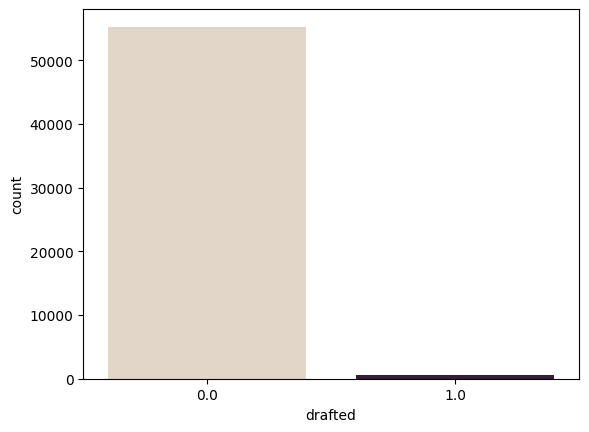

In [744]:
sns.countplot(x='drafted', data=df_cleaned_train, palette=palette)
plt.show()

In [753]:
df_cleaned_train.to_csv('../data/processed/df_cleaned_train.csv', index=False)
df_cleaned_test.to_csv('../data/processed/df_cleaned_test.csv', index=False)

### SMOTE

In [754]:
from imblearn.over_sampling import SMOTE

In [755]:
y_train = df_cleaned_train.pop('drafted')
X_train = df_cleaned_train

In [756]:
X_test = df_cleaned_test

In [757]:
smote = SMOTE(random_state=42)

In [758]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### Standard Scaling

In [759]:
from sklearn.preprocessing import StandardScaler
from joblib import dump

In [761]:
scaler = StandardScaler()

In [762]:
X_train_smote_scaled = X_train_smote.copy()
X_train_smote_scaled[num_cols] = scaler.fit_transform(X_train_smote[num_cols])

In [763]:
X_test_smote_scaled = X_test.copy()
X_test_smote_scaled[num_cols] = scaler.transform(X_test[num_cols])

#### Split training set into training and validation(80:20)

In [765]:
from sklearn.model_selection import train_test_split

In [766]:
X_train, X_val, y_train, y_val = train_test_split(X_train_smote_scaled, y_train_smote, test_size=0.2, stratify=y_train_smote, random_state=8
)

In [771]:
X_train.shape

(88419, 60)

In [772]:
X_val.shape

(22105, 60)

In [773]:
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_val.to_csv('../data/processed/X_val.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_val.to_csv('../data/processed/y_val.csv', index=False)
X_test_smote_scaled.to_csv('../data/processed/X_test.csv', index=False)

In [770]:
dump(scaler, '../models/scaler.joblib')

['../models/scaler.joblib']